In [1]:
# 기본 설정
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn as sk
import statsmodels.api as sm
import scipy
import pickle

# matplotlib 사용 시 한글 깨짐 문제 해결
from matplotlib import font_manager, rc

font_path = "D:/Anaconda3/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/KOTRA HOPE.ttf"
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)
#print(plt.rcParams['font.family'])

# 경고 메시지 비활성화
import warnings

warnings.filterwarnings("ignore")

# 경로 확인
path = os.getcwd()
print(path)

C:\Users\lsc\Desktop\ADP\ADP_study\0730


## 머신러닝 파트
### 1번 데이터 확인 및 전처리

In [254]:
import pandas as pd

df1 = pd.read_csv('./problem1-3.csv')
df1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
0,60.0,1.069141,0.043786,0.309867,1.316694,-0.462394,-0.857888,0.207904,-0.191270,0.056398,0.041567,-0.507358,-0.108666,-0.473257,0.452046,1.005675,0.185441,-0.439976,89.40,0
1,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,0.00,1
2,426.0,-1.932055,1.724618,1.288229,-0.396998,-0.140202,2.470521,-1.865298,-5.186855,0.794764,0.155379,0.034517,0.906738,-0.027172,-0.404303,-0.473949,0.274034,-0.222340,16.19,0
3,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,529.00,1
4,674.0,-0.719065,0.638954,0.686335,-0.023240,2.317890,3.871978,-0.312797,1.089780,-0.596925,-0.006142,-0.242883,-0.384491,0.109079,0.187565,1.823472,0.274346,-0.697730,22.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,172266.0,1.880157,-0.485374,0.095951,0.473297,-1.277631,-1.163752,-0.530703,-0.188080,1.340928,-0.242598,-0.032176,1.189035,0.778034,-0.327769,0.351492,-0.213423,-0.176871,35.00,0
1189,172288.0,2.100535,-0.014620,-1.602113,0.184332,0.383228,-0.768377,0.207428,-0.299064,0.584681,0.003055,-0.965941,0.225244,0.274983,0.428356,0.793141,-0.104875,-0.647107,4.49,0
1190,172329.0,2.078542,-1.119785,-0.338306,-0.727997,-1.330486,-0.669741,-1.068741,-0.125540,0.191309,0.706048,-0.754812,-0.291895,0.614961,-0.634456,0.267806,1.148287,0.127145,47.22,0
1191,172539.0,-5.823560,0.333130,-0.732746,0.770116,-3.785871,2.124706,-2.272833,2.896201,0.552732,1.113104,-1.554701,1.183078,0.287108,-0.023928,-1.800240,-1.032457,0.975180,150.00,0


In [255]:
df1.columns = [col.lower() for col in df1.columns]
display(df1.columns)

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'amount', 'class'],
      dtype='object')

#### 1-1. EDA 데이터 탐색 시각화

In [256]:
round(df1.describe(), 2)

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,amount,class
count,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00
mean,91514.49,-0.76,0.54,-1.15,0.78,-0.41,-0.28,-0.85,0.15,-0.45,-0.90,0.66,-1.01,0.01,-1.17,0.02,-0.63,-1.07,88.89,0.17
std,47896.08,3.62,2.66,3.91,2.35,2.70,1.51,3.40,2.47,1.66,2.90,1.96,3.00,1.01,3.23,0.91,2.27,3.81,220.14,0.37
min,60.00,-30.55,-33.64,-31.10,-4.29,-22.11,-10.89,-37.06,-37.35,-11.13,-23.23,-2.65,-17.23,-2.80,-18.49,-4.50,-14.13,-25.16,0.00,0.00
25%,50265.00,-1.30,-0.44,-1.61,-0.61,-0.84,-1.02,-0.81,-0.22,-1.04,-0.88,-0.60,-0.97,-0.69,-0.95,-0.55,-0.70,-0.68,3.54,0.00
50%,81797.00,-0.30,0.23,-0.23,0.33,-0.07,-0.38,-0.08,0.07,-0.21,-0.23,0.28,-0.01,0.02,-0.10,0.05,-0.06,-0.15,20.99,0.00
75%,136995.00,1.25,1.11,0.81,1.34,0.68,0.30,0.46,0.45,0.45,0.29,1.21,0.51,0.70,0.42,0.66,0.46,0.37,77.49,0.00
max,172676.00,2.32,19.17,3.32,12.11,15.28,6.27,8.12,20.01,5.92,7.14,11.67,3.11,3.07,3.89,2.87,3.14,6.74,3335.73,1.00


Distribution Plots


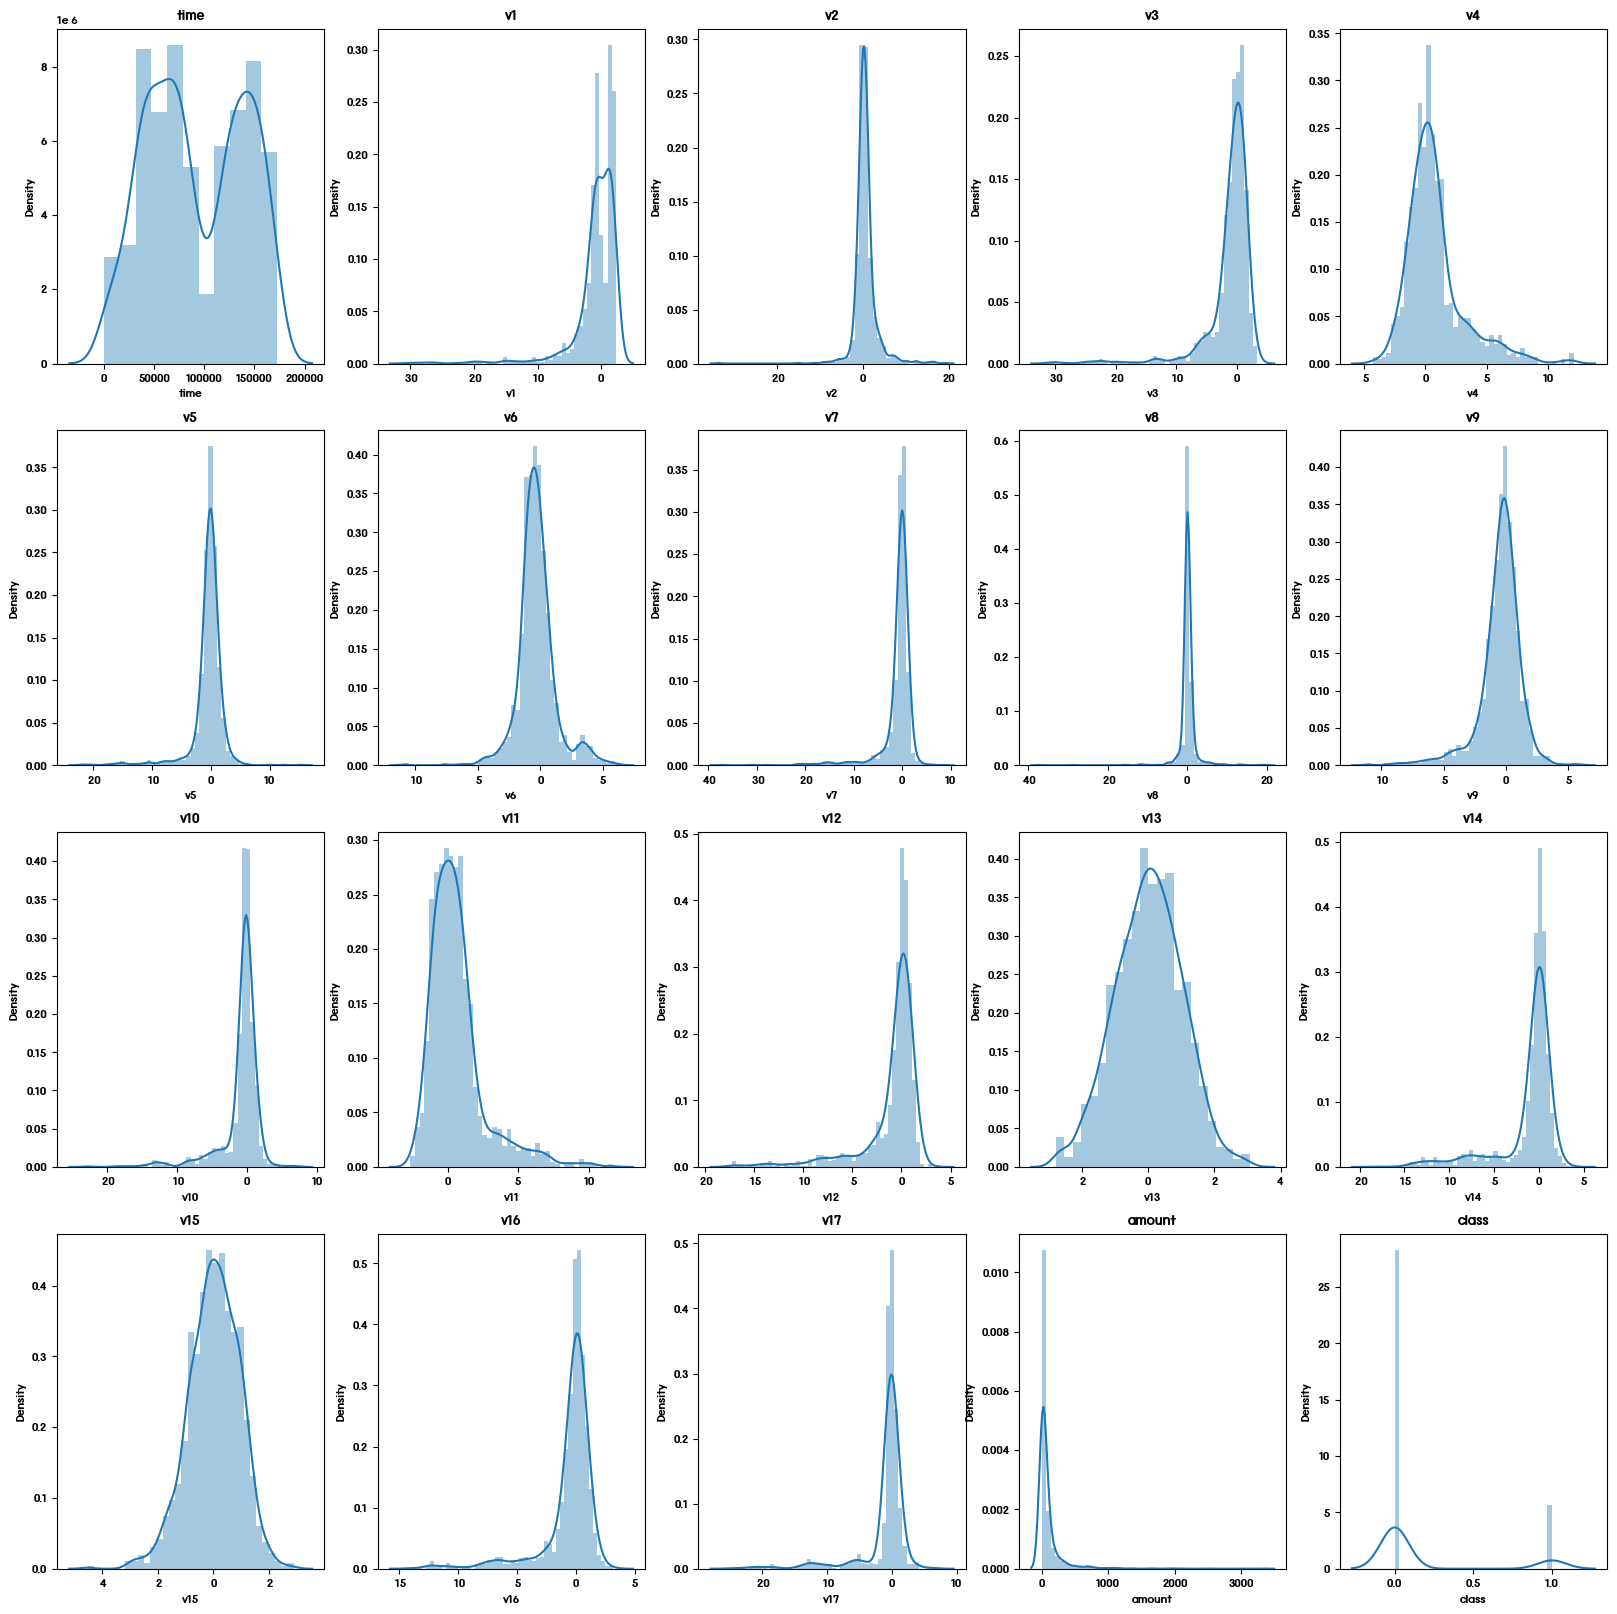

Box Plots


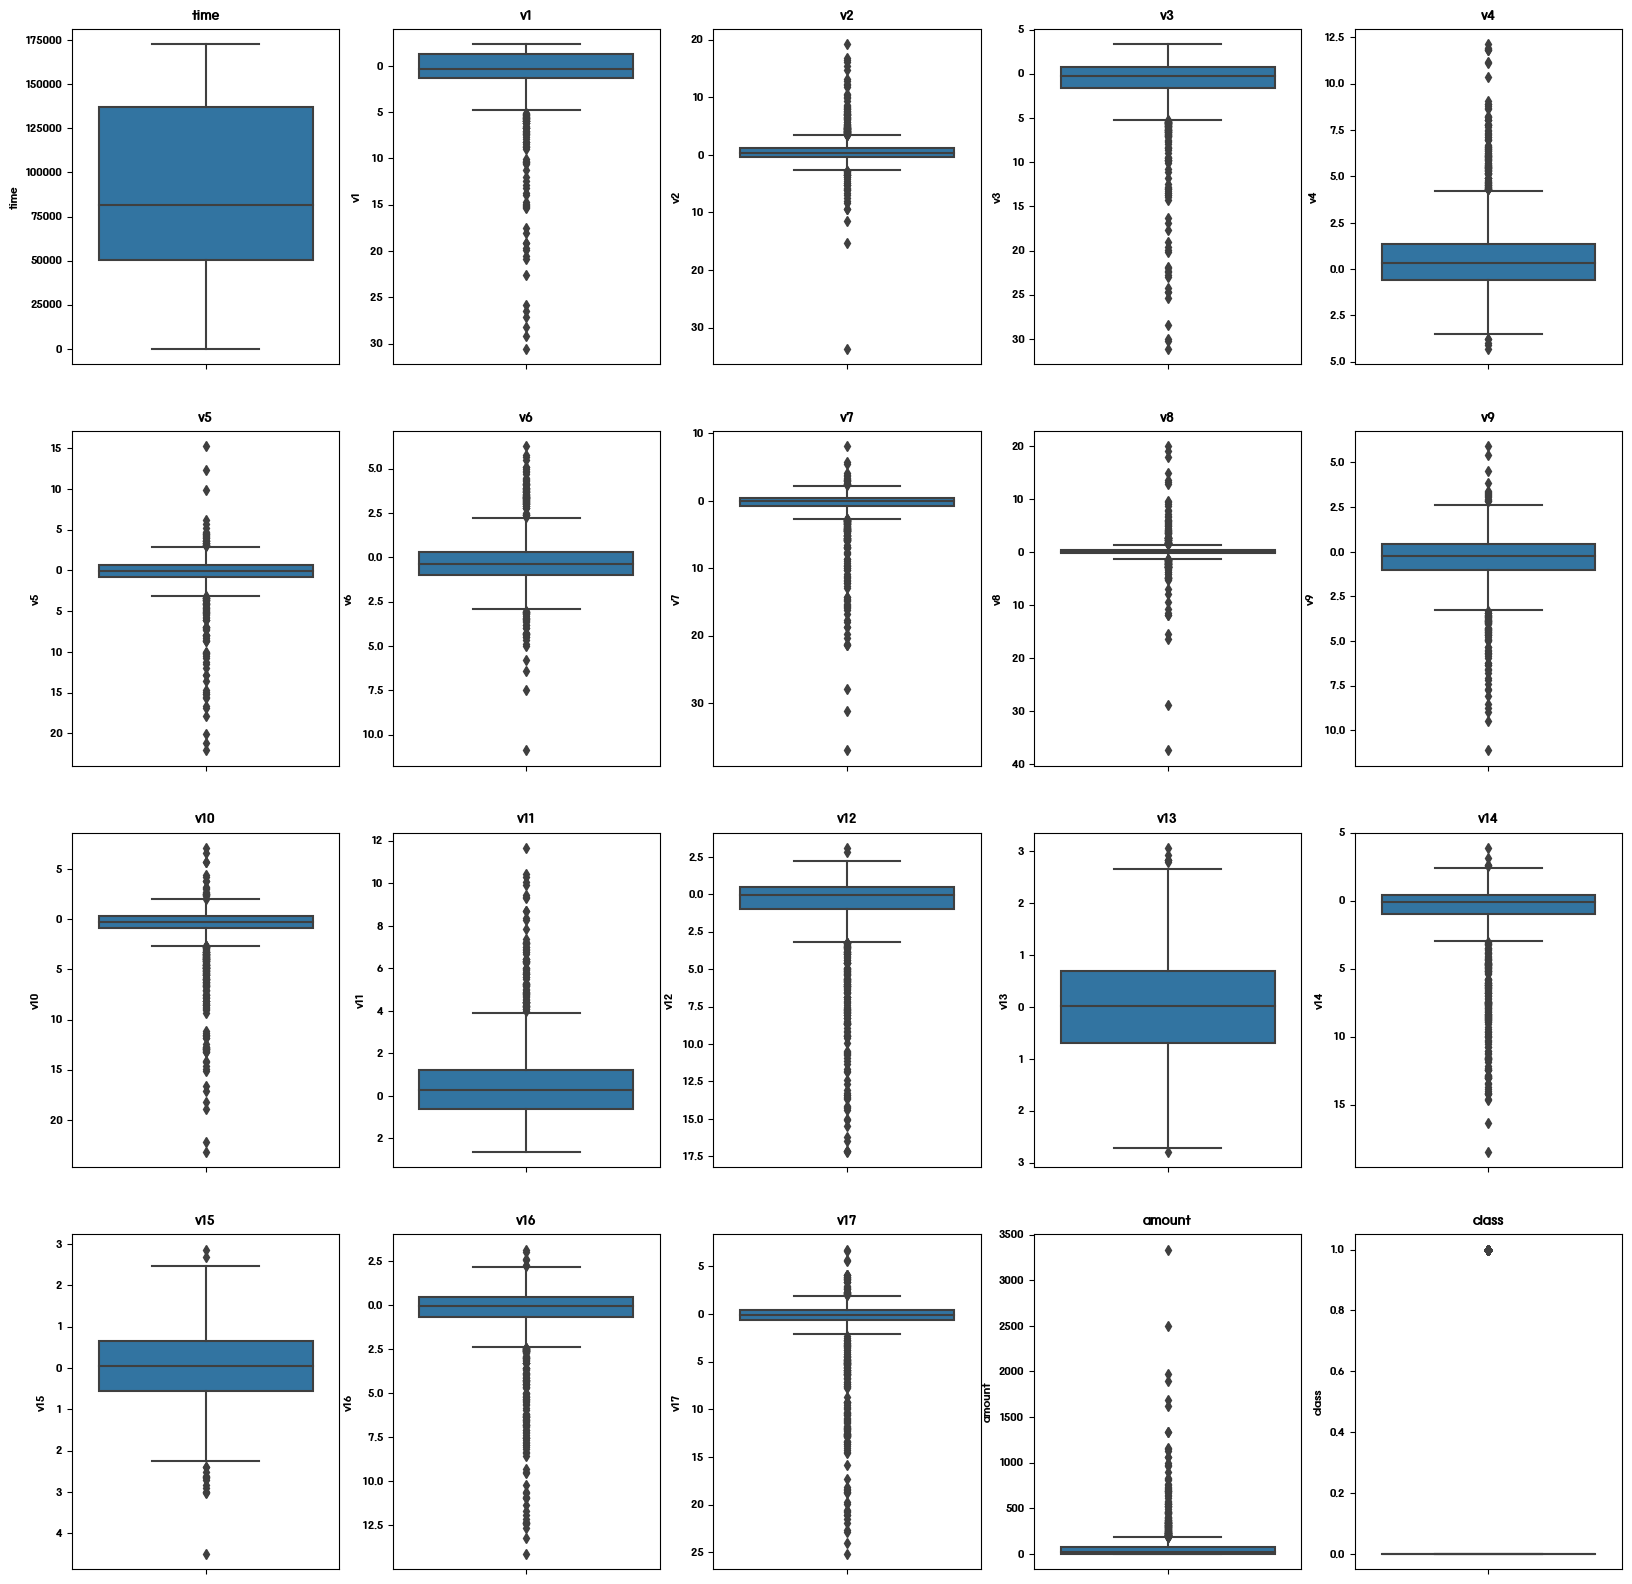

In [14]:
fig = plt.figure(figsize = (20, 20))

print("Distribution Plots")

for i, col in enumerate(df1.columns) : 
    plt.subplot(4, 5, i + 1)
    plt.title(col)
    
    sns.distplot(df1[col])
    
plt.show()

print("Box Plots")

fig2 = plt.figure(figsize = (20, 20))

for i, col in enumerate(df1.columns) : 
    plt.subplot(4, 5, i + 1)
    plt.title(col)
    
    sns.boxplot(data = df1, y = df1[col])
    
plt.show()

Distribution Plots


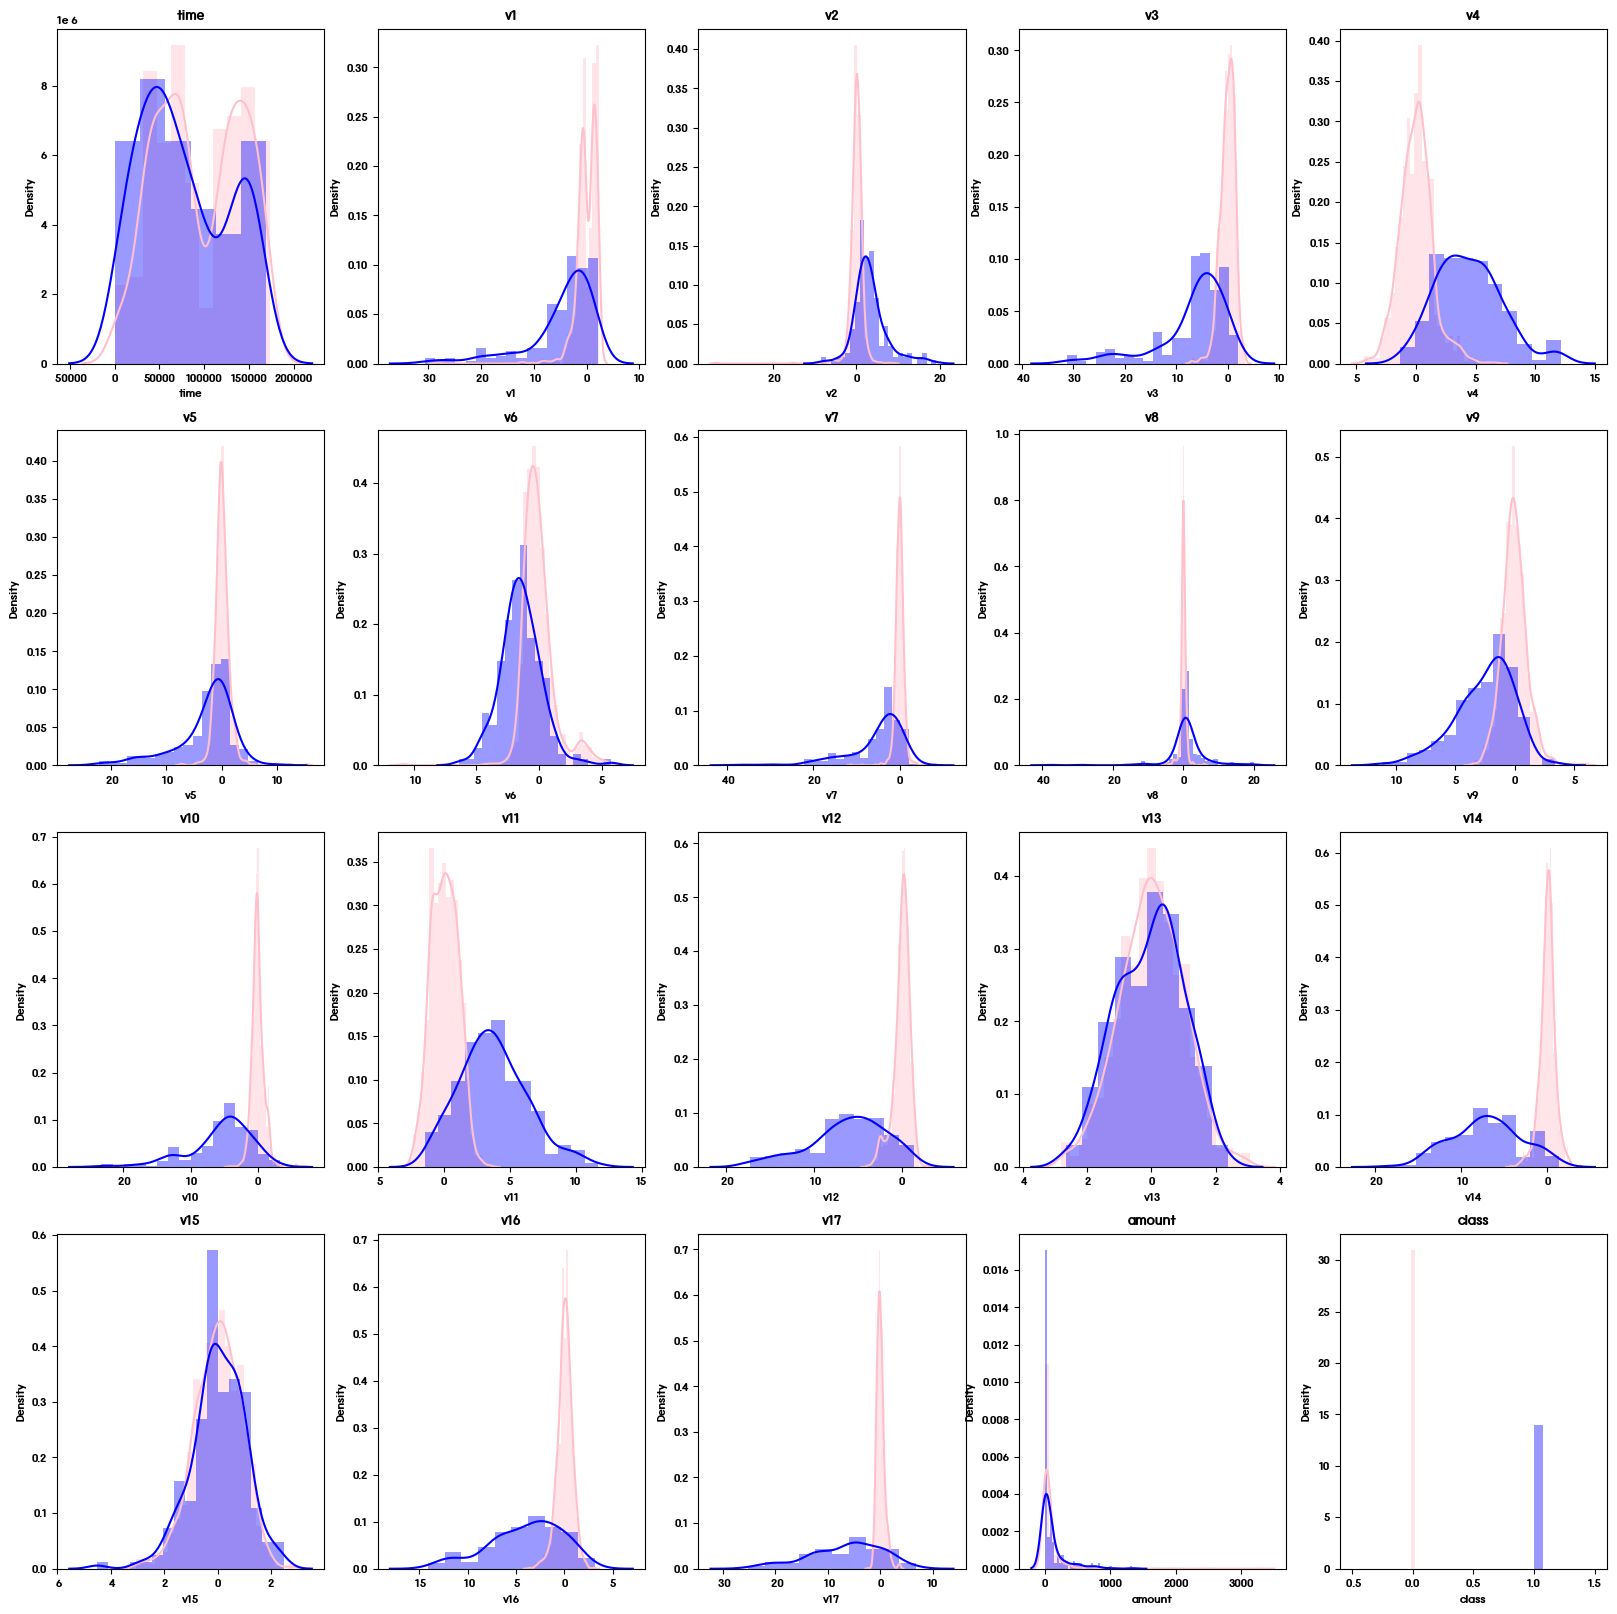

Box Plots


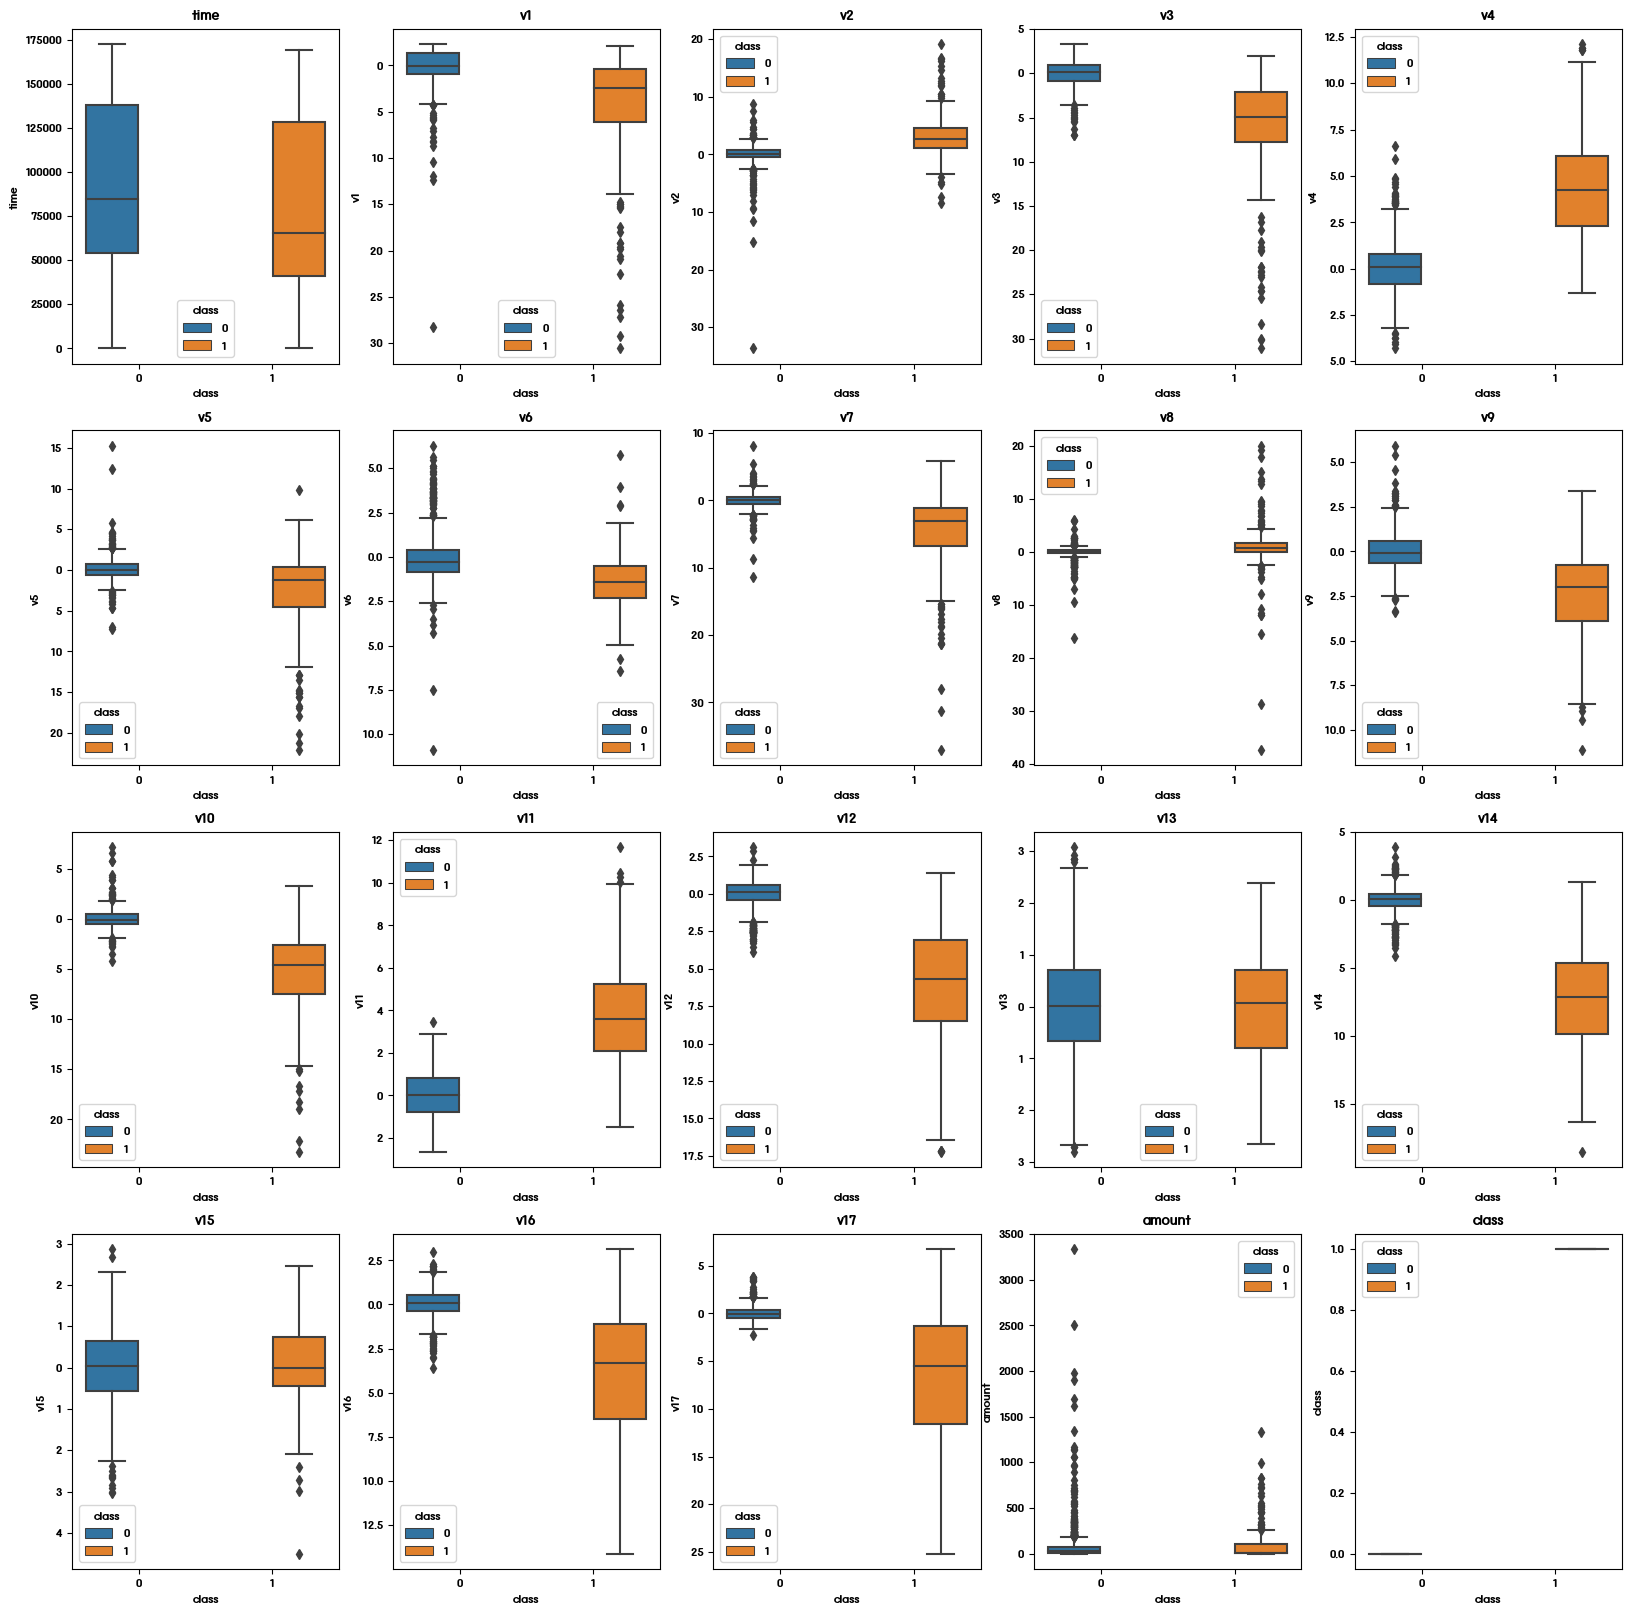

In [131]:
# 클래스별 EDA
fig3 = plt.figure(figsize = (20, 20))

print("Distribution Plots")

for i, col in enumerate(df1.columns) : 
    plt.subplot(4, 5, i + 1)
    plt.title(col)
    
    sns.distplot(df1[df1['class'] == 0][col], color = 'pink')
    sns.distplot(df1[df1['class'] == 1][col], color = 'blue')
    
plt.show()

print("Box Plots")

fig4 = plt.figure(figsize = (20, 20))

for i, col in enumerate(df1.columns) : 
    plt.subplot(4, 5, i + 1)
    plt.title(col)
    
    sns.boxplot(data = df1, x = 'class', y = col, hue = 'class')
    
plt.show()

시간대에 따른 변화


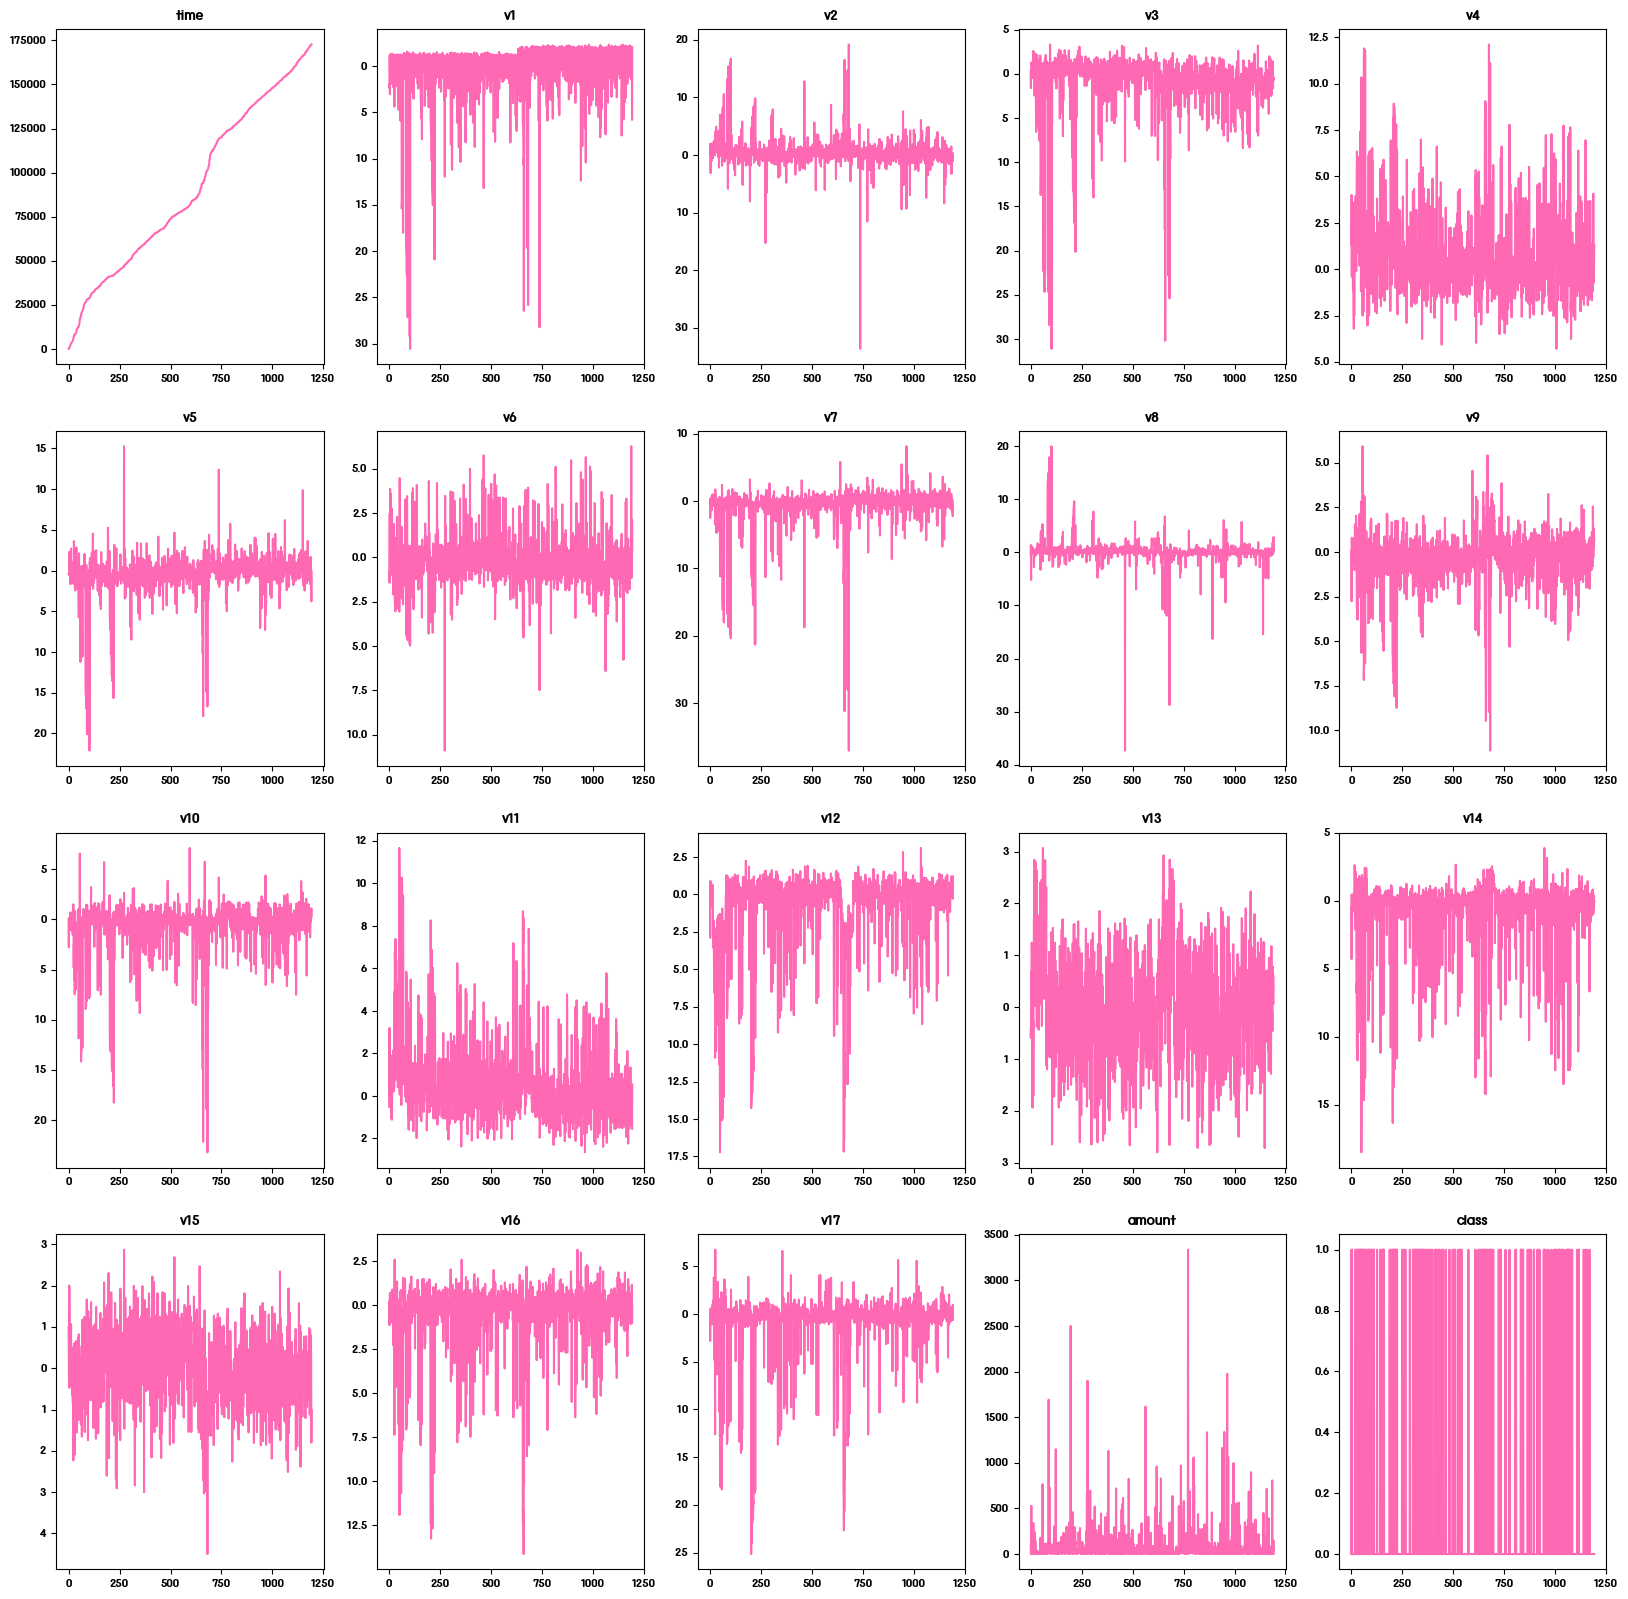

클래스별 시간대에 따른 변화



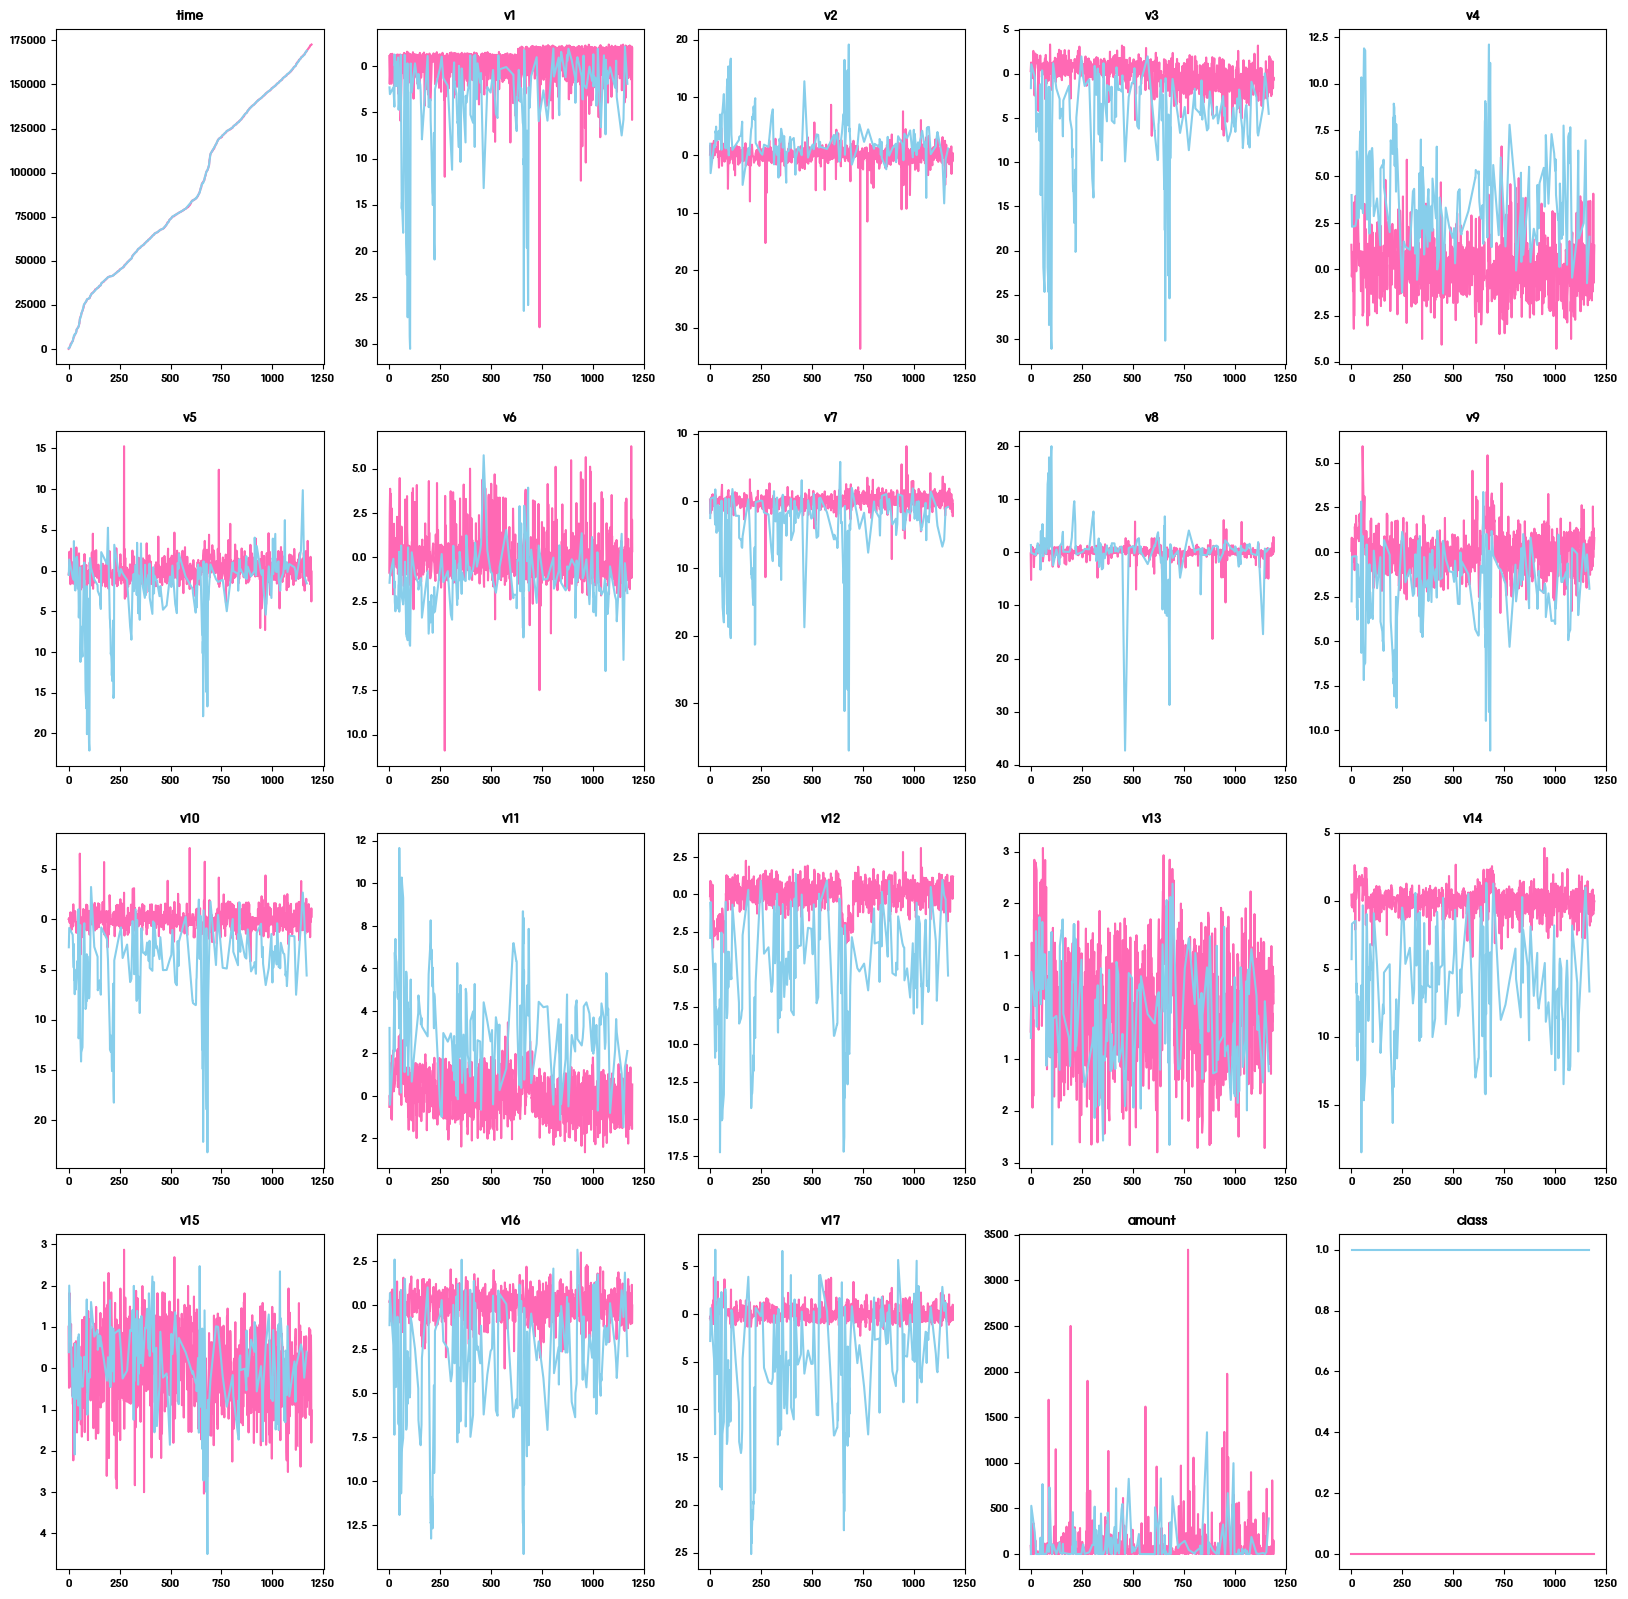

In [199]:
# 시간대에 따른 EDA
fig5 = plt.figure(figsize = (20, 20))

print('시간대에 따른 변화')

for i, col in enumerate(df1.columns) : 
    plt.subplot(4, 5, i + 1)
    plt.title(col)
    
    plt.plot(df1[col], color = 'hotpink')
    
plt.show()

fig6 = plt.figure(figsize = (20, 20))

print('클래스별 시간대에 따른 변화')
print()

for i, col in enumerate(df1.columns) : 
    plt.subplot(4, 5, i + 1)
    plt.title(col)
    
    plt.plot(df1[df1['class'] == 0][col], color = 'hotpink')
    plt.plot(df1[df1['class'] == 1][col], color = 'skyblue')
    
plt.show()

### 1-2 변수간 상관관계를 시각화하고 전처리가 필요함을 설명하라

In [257]:
y = df1['class']
x_time = df1['time']
x = df1.drop(['time', 'class'], axis = 1)

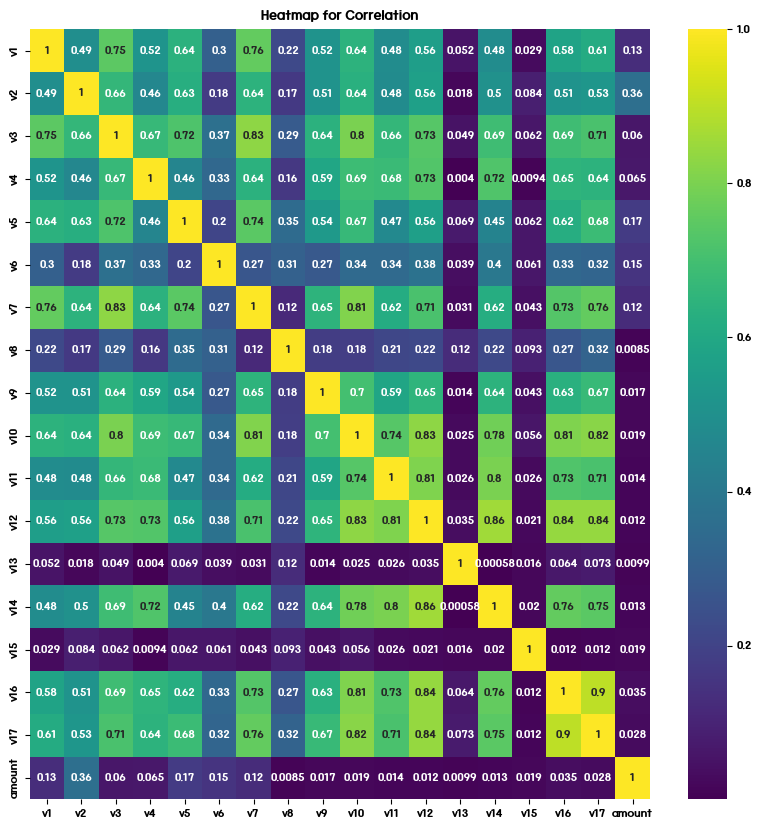

In [258]:
fig5 = plt.figure(figsize = (10, 10))

plt.title('Heatmap for Correlation')

sns.heatmap(np.abs(x.corr()), cmap = 'viridis', annot = True)

plt.show()

### 2번 차원축소 (1번 이어서)
#### 2-1 차원축소 방법 2가지 이상 비교하고 한 가지 선택

#### 방법 1. PCA

#### 방법 2. LDA

#### 2-2 추천한 한 가지를 실제로 수행하고 선택한 이유 설명

In [169]:
# 1. LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 1)
x_lda = lda.fit_transform(x, y)

In [170]:
# 2. PCA
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x)
pca_cumsum = np.cumsum(pca.explained_variance_ratio_)

print(np.argmax(pca_cumsum >= 0.9) + 1)

pca = PCA(n_components = np.argmax(pca_cumsum >= 0.9) + 1)
x_pca = pca.fit_transform(x)

1


### 3 오버샘플링 / 언더샘플링 (1번 이어서)
#### 3-1 오버샘플링과 언더샘플링의 장단점 비교 및 선택 구현

#### 3-2 구현 및 알고리즘 2가지 이상 비교, 성능 측정

In [156]:
df1['class'].value_counts()

0    993
1    200
Name: class, dtype: int64

In [176]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
x_time_mm = minmax.fit_transform(x_time.values.reshape(-1, 1))

In [249]:
x_fin = pd.concat([pd.DataFrame(x_lda), pd.DataFrame(x_time_mm)], axis = 1)
x_fin.columns = ['x', 'time']
x_fin

,x,time
0,0.659578,0.000000
1,-2.002745,0.002004
2,0.455238,0.002120
3,-0.673833,0.002387
4,0.881047,0.003557
...,...,...
1188,0.736342,0.997625
1189,0.962761,0.997752
1190,0.855397,0.997990
1191,1.034318,0.999206


In [186]:
# 1. Random Sampling
from imblearn.over_sampling import RandomOverSampler

rs = RandomOverSampler(random_state = 1234)
x_rs, y_rs = rs.fit_resample(x_fin, y)

In [187]:
# 2. SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 1234)
x_smote, y_smote = smote.fit_resample(x_fin, y)

In [188]:
# 성능 비교 전 데이터 분할 필요
from sklearn.model_selection import train_test_split

x_rs_train, x_rs_test, y_rs_train, y_rs_test = train_test_split(x_rs, y_rs, test_size = 0.3, stratify = y_rs, random_state = 1234)
x_smote_train, x_smote_test, y_smote_train, y_smote_test = train_test_split(x_smote, y_smote, test_size = 0.3, stratify = y_smote, random_state = 1234)

In [189]:
# 성능 비교 1. Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score

rf_rs = RandomForestClassifier()
rf_rs.fit(x_rs_train, y_rs_train)

pred_rs_rf = rf_rs.predict(x_rs_test)

rf_smote = RandomForestClassifier()
rf_smote.fit(x_smote_train, y_smote_train)

pred_smote_rf = rf_smote.predict(x_smote_test)

print('Ramdom Resampling')
print(f"Accuracy Score : {accuracy_score(y_rs_test, pred_rs_rf)}")
print(f"Precision Score : {precision_score(y_rs_test, pred_rs_rf)}")
print(f"Recall Score : {recall_score(y_rs_test, pred_rs_rf)}")
print(f"F1 Score : {f1_score(y_rs_test, pred_rs_rf)}")
print()
print(classification_report(y_rs_test, pred_rs_rf))

print('SMOTE')
print(f"Accuracy Score : {accuracy_score(y_smote_test, pred_smote_rf)}")
print(f"Precision Score : {precision_score(y_smote_test, pred_smote_rf)}")
print(f"Recall Score : {recall_score(y_smote_test, pred_smote_rf)}")
print(f"F1 Score : {f1_score(y_smote_test, pred_smote_rf)}")
print()
print(classification_report(y_smote_test, pred_smote_rf))

Ramdom Resampling
Accuracy Score : 0.9848993288590604
Precision Score : 0.9706840390879479
Recall Score : 1.0
F1 Score : 0.9851239669421488

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       298
           1       0.97      1.00      0.99       298

    accuracy                           0.98       596
   macro avg       0.99      0.98      0.98       596
weighted avg       0.99      0.98      0.98       596

SMOTE
Accuracy Score : 0.9714765100671141
Precision Score : 0.9667774086378738
Recall Score : 0.9765100671140939
F1 Score : 0.9716193656093489

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       298
           1       0.97      0.98      0.97       298

    accuracy                           0.97       596
   macro avg       0.97      0.97      0.97       596
weighted avg       0.97      0.97      0.97       596



In [194]:
# 성능 비교 2. Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_rs = LogisticRegression()
lr_rs.fit(x_rs_train, y_rs_train)

pred_rs_lr = lr_rs.predict(x_rs_test)

lr_smote = RandomForestClassifier()
lr_smote.fit(x_smote_train, y_smote_train)

pred_smote_lr = lr_smote.predict(x_smote_test)

print('Ramdom Resampling')
print(f"Accuracy Score : {accuracy_score(y_rs_test, pred_rs_lr)}")
print(f"Precision Score : {precision_score(y_rs_test, pred_rs_lr)}")
print(f"Recall Score : {recall_score(y_rs_test, pred_rs_lr)}")
print(f"F1 Score : {f1_score(y_rs_test, pred_rs_lr)}")
print()
print(classification_report(y_rs_test, pred_rs_lr))

print('SMOTE')
print(f"Accuracy Score : {accuracy_score(y_smote_test, pred_smote_lr)}")
print(f"Precision Score : {precision_score(y_smote_test, pred_smote_lr)}")
print(f"Recall Score : {recall_score(y_smote_test, pred_smote_lr)}")
print(f"F1 Score : {f1_score(y_smote_test, pred_smote_lr)}")
print()
print(classification_report(y_smote_test, pred_smote_lr))

Ramdom Resampling
Accuracy Score : 0.9463087248322147
Precision Score : 0.9618055555555556
Recall Score : 0.9295302013422819
F1 Score : 0.9453924914675769

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       298
           1       0.96      0.93      0.95       298

    accuracy                           0.95       596
   macro avg       0.95      0.95      0.95       596
weighted avg       0.95      0.95      0.95       596

SMOTE
Accuracy Score : 0.9681208053691275
Precision Score : 0.9603960396039604
Recall Score : 0.9765100671140939
F1 Score : 0.9683860232945091

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       298
           1       0.96      0.98      0.97       298

    accuracy                           0.97       596
   macro avg       0.97      0.97      0.97       596
weighted avg       0.97      0.97      0.97       596



### 4 이상탐지 (1번 이어서)
#### 4-1 이상탐지 모델 2가지 이상 기술, 장/단점 설명

In [ ]:
# 1. Isolation Forest

In [ ]:
# 2. Clustering

#### 4-2 `2번`에서 만든 데이터로 한 가지 이상탐지 모델을 구현하고, `3번`에서 만든 모델과 비교

In [380]:
x_fin = pd.concat([pd.DataFrame(x_lda), x_time, df1['class']], axis = 1)
x_fin.columns = ['x_lda', 'time', 'class']

In [381]:
from statsmodels.tsa.stattools import adfuller

print(round(adfuller(x_fin['x_lda'])[1], 4))

0.0


<Axes: >

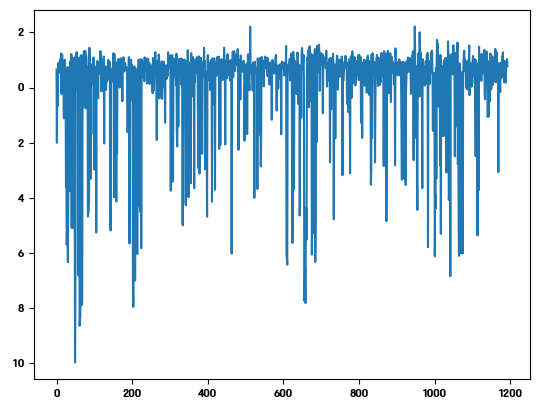

In [382]:
x_fin['x_lda'].plot()

<Axes: >

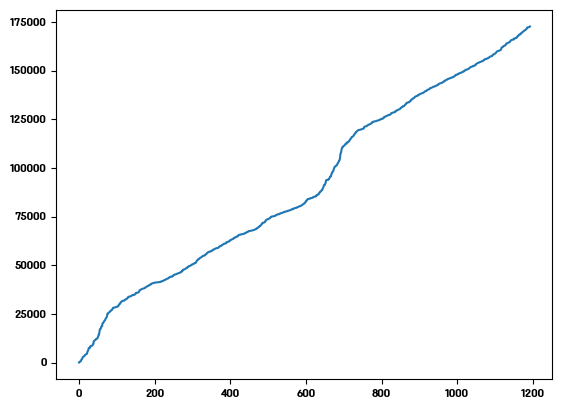

In [383]:
x_fin['time'].plot()

In [384]:
start_day = datetime.strptime('2023-07-30', '%Y-%m-%d')
x_fin.index = pd.date_range(start = start_day, end = start_day + timedelta(len(df1) - 1), freq = 'D')
x_fin.index

DatetimeIndex(['2023-07-30', '2023-07-31', '2023-08-01', '2023-08-02',
               '2023-08-03', '2023-08-04', '2023-08-05', '2023-08-06',
               '2023-08-07', '2023-08-08',
               ...
               '2026-10-25', '2026-10-26', '2026-10-27', '2026-10-28',
               '2026-10-29', '2026-10-30', '2026-10-31', '2026-11-01',
               '2026-11-02', '2026-11-03'],
              dtype='datetime64[ns]', length=1193, freq='D')

In [385]:
x_fin['diff1'] = x_fin['x_lda'].diff().fillna(0)
x_fin['diff2'] = x_fin['x_lda'].diff(2).fillna(0)
x_fin

,x_lda,time,class,diff1,diff2
2023-07-30,0.659578,60.0,0,0.000000,0.000000
2023-07-31,-2.002745,406.0,1,-2.662323,0.000000
2023-08-01,0.455238,426.0,0,2.457983,-0.204340
2023-08-02,-0.673833,472.0,1,-1.129072,1.328911
2023-08-03,0.881047,674.0,0,1.554881,0.425809
...,...,...,...,...,...
2026-10-30,0.736342,172266.0,0,0.558207,-0.144812
2026-10-31,0.962761,172288.0,0,0.226418,0.784625
2026-11-01,0.855397,172329.0,0,-0.107363,0.119055
2026-11-02,1.034318,172539.0,0,0.178921,0.071558


In [386]:
window_size = 5

x_roll_mean = x_fin['x_lda'].rolling(window = window_size, min_periods = 1, center = True).mean()
x_roll_std = x_fin['x_lda'].rolling(window = window_size, min_periods = 1, center = True).std()

x_roll_upper, x_roll_lower = x_roll_mean + 3 * x_roll_std, x_roll_mean - 3 * x_roll_std

x_fin = pd.concat([x_fin, x_roll_upper, x_roll_lower], axis = 1)
x_fin.columns = ['x_lda', 'time', 'class', 'diff1', 'diff2', 'upper', 'lower']
x_fin

,x_lda,time,class,diff1,diff2,upper,lower
2023-07-30,0.659578,60.0,0,0.000000,0.000000,4.148919,-4.740871
2023-07-31,-2.002745,406.0,1,-2.662323,0.000000,3.282793,-4.063674
2023-08-01,0.455238,426.0,0,2.457983,-0.204340,3.473498,-3.745784
2023-08-02,-0.673833,472.0,1,-1.129072,1.328911,3.394404,-3.713897
2023-08-03,0.881047,674.0,0,1.554881,0.425809,2.279204,-1.477400
...,...,...,...,...,...,...,...
2026-10-30,0.736342,172266.0,0,0.558207,-0.144812,1.667975,-0.222459
2026-10-31,0.962761,172288.0,0,0.226418,0.784625,1.775562,-0.268781
2026-11-01,0.855397,172329.0,0,-0.107363,0.119055,1.252103,0.489631
2026-11-02,1.034318,172539.0,0,0.178921,0.071558,1.259356,0.549640


In [376]:
x_fin['decision'].value_counts()

    1193
Name: decision, dtype: int64

#### 4-3 데이터 분석가 관점에서 3번에서 만든 모델과 4번에서 만든 모델 설명

## 통계파트
#### 5번
2년 전 제품 생산량이 100,000개, 1년 전 제품 생산량이 150,000개, 그 후 팩토리 기술의 상승으로 제품 생산량이 250,000개 되었을 때, 연평균 상승률의 대푯값을 구하시오. (반올림하여 소수점 아래 둘째자리까지 표기하시오.)

In [66]:
n2 = 100000
n1 = 150000
n = 250000

ratio1 = (n1 - n2) / n2
ratio2 = (n - n1) / n1

print(round(np.mean([ratio1, ratio2]), 2))

0.58


#### 6번
12건의 광고시간 측정. 평균 15.5초, 분산 3.2초 일때 90% 신뢰구간은?

In [83]:
from scipy.stats import t

n = 12
dof = n - 1
mean = 15.5
var = 3.2
std_err = np.std(np.std(var, ddof = dof) / n)

print(t.interval(confidence = 0.9, df = dof, loc = mean, scale = std_err))

(nan, nan)


#### 7번
강의 상류와 하류의 생물 다양성 점수에 차이가 있는지 검정하시오. (단, 같은 강에서 상류와 하류는 서로 독립적이지 않으며, 종속적인 관계에 있다.)

- 7.1 귀무가설과 대립가설을 세우시오

- 7.2 검정 통계량과 유의 확률을 구하고, 연구가설 채택여부를 검정하시오.

In [85]:
import pandas as pd

df2 = pd.read_csv('./river.csv')
df2

,River,up,down
0,A,57.1,45.7
1,B,51.6,37.2
2,C,53.9,53.3
3,D,59.0,54.3
4,E,57.5,46.3
5,F,46.1,61.3
6,G,53.8,42.7
7,H,49.4,50.2
8,I,49.6,49.1
9,J,51.6,57.7


#### 7-1 귀무가설과 대립가설을 세우시오

H_0 : 강의 상류와 하류의 생물 다양성 점수에 차이가 없다.  
H_1 : 강의 상류와 하류의 생물 다양성 점수에 차이가 존재한다.

#### 7.2 검정 통계량과 유의 확률을 구하고, 연구가설 채택여부를 검정하시오.

In [90]:
from scipy.stats import ttest_rel

result = ttest_rel(df2['up'], df2['down'])

print(f'검정통계량 : {round(result[0], 3)}')
print(f'유의확률 : {round(result[1], 3)}')
print()

if result[1] < 0.05 :
    print('귀무가설 기각, 연구가설 채택')
    print('강의 상류와 하류의 생물 다양성 점수에 차이가 존재하다는 주장은 통계적으로 유의하다.')
else : 
    print('귀무가설 기각 불가, 연구가설 기각')
    print('강의 상류와 하류의 생물 다양성 점수에 차이가 존재하다는 주장은 통계적으로 유의하지 않다.')

검정통계량 : 1.292
유의확률 : 0.213

귀무가설 기각 불가, 연구가설 기각
강의 상류와 하류의 생물 다양성 점수에 차이가 존재하다는 주장은 통계적으로 유의하지 않다.


#### 8번
user_counts를 종속변수로 하는 데이터이다

- 8.1 분위수 회귀분석 (Quantile Regression) 을 사용하여 회귀 계수를 구하시오. (반올림하여 소수점 아래 둘째자리까지 표기하시오.)

- 8.2 `8.1`의 모델의 회귀계수를 활용하여 temperature : 10.5 , wind : 8.2 , precipitation : 3.5 일때 user_counts를 예측하시오

In [104]:
import pandas as pd

df3 = pd.read_csv('./problem8.csv')
df3

,temperature,wind,precipitation,user_counts
0,10.400000,4.600000,0.844944,6368
1,5.666667,4.625000,0.040860,5902
2,4.933333,4.725000,0.008696,6226
3,3.400000,2.675000,0.156989,5829
4,8.900000,3.950000,7.988462,7589
...,...,...,...,...
2092,3.500000,2.100000,0.024096,5430
2093,8.233333,2.000000,16.843820,2125
2094,9.500000,3.666667,11.550575,6008
2095,4.800000,1.200000,0.104651,4929


#### 8-1 분위수회귀를 사용하여 백분위 50%로 잡고 회귀 계수를 구하시오.
(반올림하여 소수점 둘째자리 까지 표기하시오)

In [114]:
from sklearn.linear_model import QuantileRegressor

df3_y = df3['user_counts']
df3_x = df3.drop('user_counts', axis = 1)

qr = QuantileRegressor(quantile = 0.5)
qr.fit(df3_x, df3_y)

QuantileRegressor()

#### 8-2 
`8-1` 모델의 회귀계수를 활용하여 temperature: 10.5, wind: 8.2, precipitation: 3.5 일때 `user_counts`를 예측하시오

In [130]:
round(qr.predict([[10.5, 8.2, 3.5]])[0], 2)

8278.75

#### 9번
지하철 호선과 월별, 승객 수 간 상관관계가 있는지 확인(Type III Anova 사용)

- 9.1 귀무가설과 대립가설 설정하라

- 9.2 통계량을 구하고, 대립가설 채택여부를 기술하라

In [116]:
import pandas as pd

df4 = pd.read_csv('./subway.csv')
df4

,line,month,total
0,1,1,1703
1,1,2,1548
2,1,3,1615
3,1,4,1739
4,1,5,1735
5,1,6,1401
6,1,7,1609
7,1,8,1464
8,1,9,1418
9,1,10,1565


#### 9-1
귀무가설과 대립가설을 설정하라

H_0 : 지하철 호선과 월(月), 승객 수 간 상관관계가 없다.  
H_1 : 세 요소 (지하철 호선, 월, 승객 수) 중 최소 두 요소의 상관관계가 존재한다. 

#### 9-2
통계량을 구하고, 대립가설 채택여부를 기술하라

In [118]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'total ~ C(line) + C(month) + C(line) : C(month)'
ols_model = ols(formula, df4).fit()

print(anova_lm(ols_model))

                    df        sum_sq       mean_sq    F  PR(>F)
C(line)            3.0  1.354562e+03  4.515208e+02  0.0     NaN
C(month)          11.0  4.723557e+05  4.294143e+04  0.0     NaN
C(line):C(month)  33.0  3.528069e+04  1.069112e+03  0.0     NaN
Residual           0.0  1.151849e-22           inf  NaN     NaN
